In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import Perceptron


In [18]:
data_dir = "./../Data/"
data = pd.read_csv(data_dir + "long_short_covid_data.csv")

In [19]:
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,covid,sixty_above,male,long_covid
0,0,0,0,0,0,1.0,0.0,0.0,0
1,0,0,0,0,0,1.0,0.0,0.0,0
2,0,0,0,0,0,1.0,0.0,1.0,0
3,0,0,0,0,0,1.0,0.0,0.0,0
4,0,0,0,0,0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
24019,0,1,0,0,0,1.0,0.0,1.0,0
24020,0,0,0,0,1,1.0,0.0,1.0,0
24021,0,0,0,0,0,1.0,0.0,0.0,0
24022,0,0,0,0,0,1.0,0.0,1.0,0


In [22]:
short = data[data["long_covid"] == 0]

In [38]:
short.shape

(20342, 9)

In [40]:
short1 = short[:5000]

In [43]:
long = data[data["long_covid"] == 1]

In [44]:
long.shape

(3682, 9)

In [45]:
combined = pd.concat([long, short1])

In [48]:
label = combined["long_covid"]

In [49]:
label

34      1
48      1
50      1
51      1
52      1
       ..
5636    0
5637    0
5638    0
5639    0
5640    0
Name: long_covid, Length: 8682, dtype: int64

In [52]:
combined.drop("long_covid", axis=1, inplace = True)

In [53]:
combined

,cough,fever,sore_throat,shortness_of_breath,head_ache,covid,sixty_above,male
34,1,0,0,0,1,1.0,0.0,1.0
48,0,1,1,0,0,1.0,1.0,0.0
50,0,0,0,0,1,1.0,1.0,1.0
51,1,0,0,0,0,1.0,1.0,0.0
52,1,1,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5636,0,0,0,0,1,1.0,0.0,0.0
5637,0,0,0,0,0,1.0,0.0,1.0
5638,0,0,0,0,0,1.0,0.0,1.0
5639,0,1,0,0,0,1.0,0.0,0.0


In [54]:
train_X, test_X, train_y, test_y = train_test_split(combined, label, test_size=0.35)

In [55]:
train_X.shape

(5643, 8)

# Support Vector Machine

In [56]:
svc = SVC()

In [57]:
svc.fit(train_X, train_y)

SVC()

In [58]:
pred = svc.predict(test_X)

In [59]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00      1289

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039



<AxesSubplot:>

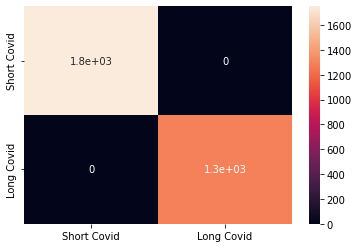

In [60]:
cm = confusion_matrix(test_y, pred)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# Logistic Regression

In [61]:
lr = LogisticRegression()

In [62]:
lr.fit(train_X, train_y)

LogisticRegression()

In [63]:
pred2 = lr.predict(test_X)

In [64]:
print(classification_report(test_y, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00      1289

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039



<AxesSubplot:>

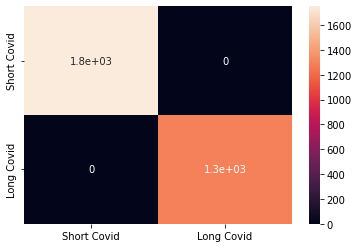

In [65]:
cm = confusion_matrix(test_y, pred2)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# KNN


In [66]:
knn = KNN(n_neighbors=2)

In [67]:
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=2)

In [68]:
pred3 = knn.predict(test_X)

C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [69]:
print(classification_report(test_y, pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00      1289

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039



<AxesSubplot:>

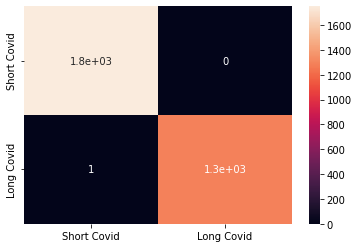

In [70]:
cm = confusion_matrix(test_y, pred3)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# Perceptron

In [71]:
perceptron = Perceptron(tol=1e-3, random_state=0)

In [72]:
perceptron.fit(train_X, train_y)

Perceptron()

In [73]:
perceptron.score(test_X, test_y)

1.0

In [74]:
pred4 = perceptron.predict(test_X)

In [75]:
print(classification_report(test_y, pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00      1289

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039



<AxesSubplot:>

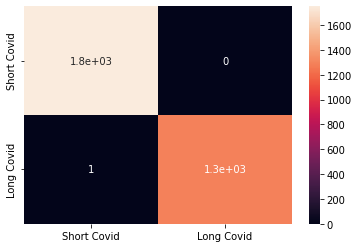

In [76]:
cm = confusion_matrix(test_y, pred3)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])